<b>Trabalho Prático 1 Aprendizado de Máquina: Redes Neuronais <br> </b>
Aluno: Nélio Cezar Muniz Sampaio <br>
Matrícula: 2015042150

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando dados
dataset = pd.read_csv('data_tp1')

#Separando em (x, y)
x = dataset.iloc[:, 1:785].values / 255
y = dataset.iloc[:, 0]

# Transformando saída em vetor.
y2 = y
conv_arr = y2.values

d = [ [] for i in range(len(conv_arr))]
for ind, i in enumerate(conv_arr):
    for j in range(10):
        if i==j:
            d[ind].append(1)
        else:
            d[ind].append(0)

df = pd.DataFrame(data=d)

#Separando em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df, test_size = 0.2, random_state = 0 )

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.


Variação do número de unidades na camada oculta.

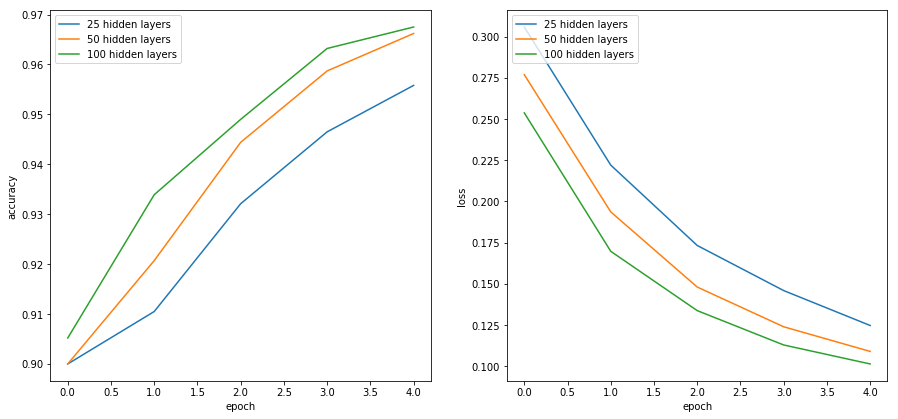

In [44]:
# Inicializando a ANN
classifier_25 = Sequential()
classifier_50 = Sequential()
classifier_100 = Sequential()

#Adiciona Camadas:

# Adicionando input layer e a hidden layer
# units: neuronios na hidden layer; kernel_initializer: inicializar os pesos aleatoriamente; 
# activation: função de ativação; input_dim: neurônios na input layer.

# 25 Unidades na camada oculta
classifier_25.add( Dense(units=25, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_25.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 50 Unidades na camada oculta:
classifier_50.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_50.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 100 Unidades na camada oculta:
classifier_100.add( Dense(units=100, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_100.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

#
sgd = optimizers.SGD(lr=0.5)

# Compilando
classifier_25.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_50.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_100.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

epocas = 5

history = classifier_25.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_25 = history.history["acc"]
model_accuracy_25 = history.history['val_acc']
loss_25 = history.history['val_loss']

history = classifier_50.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_50 = history.history["acc"]
model_accuracy_50 = history.history['val_acc']
loss_50 = history.history['val_loss']

history = classifier_100.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_100 = history.history["acc"]
model_accuracy_100 = history.history['val_acc']
loss_100 = history.history['val_loss']


#f, (ax1, ax2) = plt.subplots(2)

#fig1 = plt.figure()
#ax1 = fig1.add_subplot(1,2,1)
'''
ax1.plot (model_accuracy_25)
ax1.plot(model_accuracy_50)
ax1.plot(model_accuracy_100)
ax1.set_title('Accuracy per epoch')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='lower right' )

ax2.plot (loss_25)
ax2.plot(loss_50)
ax2.plot(loss_100)
ax2.set_title('Loss per epoch')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='upper right' )

plt.tight_layout()

'''

#plt.title('Accuracy per epoch')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='lower right' )

#fig2 = plt.figure()
#ax2 = fig2.add_subplot(2,2,2)
#ax2.plot (loss_25)
#ax2.plot(loss_50)
#ax2.plot(loss_100)
#ax2.set_title('Loss per epoch')
#ax2.set_ylabel('loss')
#ax2.set_xlabel('epoch')
#ax2.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='upper right' )
#ax1.plot(model_accuracy_25)
#plt.title('Loss per epoch')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='lower right' )

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.plot(model_accuracy_25)
ax1.plot(model_accuracy_50)
ax1.plot(model_accuracy_100)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='upper left' )

ax2 = fig.add_subplot(222)
ax2.plot(loss_25)
ax2.plot(loss_50)
ax2.plot(loss_100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='upper left' )

'''
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(accuracy_50)
ax2.plot(model_accuracy_50)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(accuracy_100)
ax3.plot(model_accuracy_100)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )
'''

'''
plt.subplot(2, 1, 1)
plt.plot(accuracy_25)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.subplot(model_accuracy_25)
plt.subplot(2, 1, 1)
plt.plot(accuracy_50)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.subplot(model_accuracy_50)
plt.subplot(2, 1, 1)
plt.plot(accuracy_100)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.subplot(model_accuracy_100)
plt.legend( ['train', 'test'], loc='upper left' )
'''

plt.show()



In [ ]:
# Compilando
sgd = optimizers.SGD(lr=10)
classifier.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

history = classifier.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=32, epochs=50, verbose=0)

accuracy_1 = history.history["acc"]
model_accuracy_1 = history.history['val_acc']

plt.plot(accuracy_1)
plt.plot(model_accuracy_1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

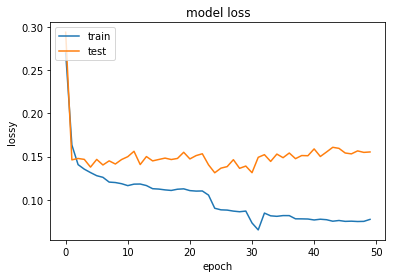

In [114]:
#print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('lossy')
plt.xlabel('epoch')
plt.legend( ['train', 'test'], loc='upper left' )
plt.show

In [106]:
classifier.summary()
#x_train.max()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
